In [1]:
from keras.models import model_from_json
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3, preprocess_input 
from keras.models import Model 
from keras.preprocessing.sequence import pad_sequences 
from pickle import load,dump
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import load_img, img_to_array 
def preprocess_img(img_path): 
    # inception v3 accepts img as 299 * 299 * 3
    img = load_img(img_path, target_size = (299, 299)) 
    x = img_to_array(img) 
    # Add one more dimension 
    x = np.expand_dims(x, axis = 0) 
    x = preprocess_input(x) 
    return x 
  
def encode(image): 
    image = preprocess_img(image) 
    vec = img_model.predict(image) 
    vec = np.reshape(vec, (vec.shape[1])) 
    return vec 

base_model = InceptionV3(weights = 'imagenet') 
img_model = Model(base_model.input, base_model.layers[-2].output)

In [3]:
with open("model.json","r") as f:
    model = model_from_json(f.read())

print("Model loaded successfully")

Model loaded successfully


In [4]:
# loading the weights of the model
model.load_weights("model.h5")
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 300)      495600      input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 2048)         0           input_2[0][0]                    
_______________________________________________________________________________________

In [5]:
max_length = 34

with open("wordtoix.pkl","rb") as f:
    wordtoix = load(f)
    
with open("ixtoword.pkl","rb") as f:
    ixtoword = load(f)

def predict_caption(pic): 
    start = 'startseq'
    for i in range(max_length): 
        seq = [wordtoix[word] for word in start.split() if word in wordtoix] 
        seq = pad_sequences([seq], maxlen = max_length) 
        yhat = model.predict([pic, seq]) 
        yhat = np.argmax(yhat) 
        word = ixtoword[yhat] 
        start += ' ' + word 
        if word == 'endseq': 
            break
    final = start.split() 
    final = final[1:-1] 
    final = ' '.join(final) 
    return final

In [6]:
def imgpathtolist(picpath):
    piclist = list()
    piclist.append(encode(picpath))
    piclist = np.array(piclist)
    return piclist

'black and white dog is jumping over log'

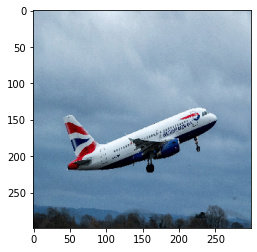

In [7]:
img = load_img("testimage1.jpg",target_size=(299,299))
plt.imshow(img)
predict_caption(imgpathtolist('testimage1.jpg'))

'two girls are playing with sand'

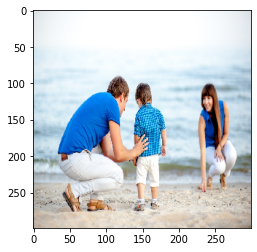

In [8]:
img = load_img("testimage3.jpg",target_size=(299,299))
plt.imshow(img)
predict_caption(imgpathtolist('testimage3.jpg'))

'girl in white shirt is standing on the sidewalk'

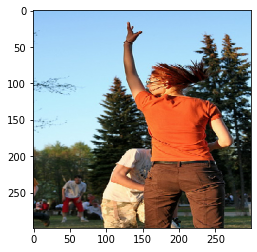

In [11]:
img = load_img("data/Flicker8k_Dataset/3138399980_d6ab8b2272.jpg",target_size=(299,299))
plt.imshow(img)
predict_caption(imgpathtolist('data/Flicker8k_Dataset/3138399980_d6ab8b2272.jpg'))